In [0]:
# https://justpaste.it/99hos
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from datetime import date
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import pandas as pd
import numpy as np

import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [1]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\DL_TSA\SBUX.US_D1.csv",
                 cache_dates="datetime",
                 index_col="datetime")
df.head()

,open,high,low,close,volume
datetime,,,,,
1998-01-02,38.38,38.63,37.31,37.50,594000
1998-01-05,37.63,37.78,36.75,37.13,644000
1998-01-06,37.13,37.38,35.56,35.63,1183300
1998-01-07,35.50,36.44,34.25,34.69,2039005
1998-01-08,34.56,36.01,34.00,35.76,1638105


In [2]:
# we will select the close prise variable for time series forecasting
Close = df["close"]

<Axes: xlabel='datetime'>

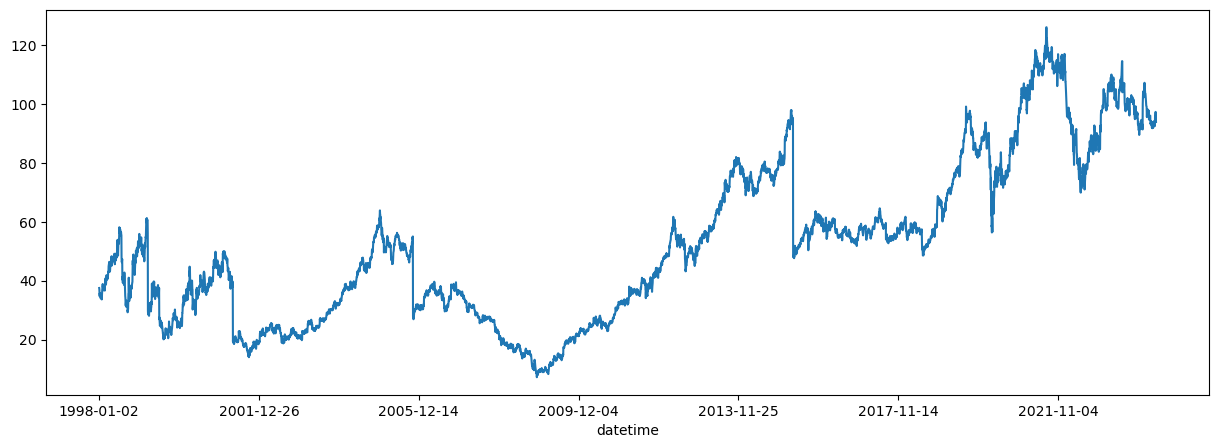

In [3]:
df['close'].plot(figsize = (15,5))

In [4]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# ## Decomposer
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Perform decomposition
# decomposition = seasonal_decompose(df['close'], model="multiplicative",period= 365 )

# # Plot the decomposition components
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.figure(figsize=(12, 6))

# plt.subplot(411)
# plt.plot(df['close'], label='Original')
# plt.legend(loc='upper left')

# plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='upper left')

# plt.subplot(413)
# plt.plot(seasonal, label='Seasonal')
# plt.legend(loc='upper left')

# plt.subplot(414)
# plt.plot(residual, label='Residual')
# plt.legend(loc='upper left')

# plt.tight_layout()
# plt.show()


In [5]:
# transform values in the range of 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
Close_scaled =scaler.fit_transform(np.array(Close).reshape(-1,1))
Close_scaled

array([[0.25492176],
       [0.25180885],
       [0.23918896],
       ...,
       [0.75803466],
       [0.7426384 ],
       [0.72917718]])

In [6]:
a = int(len(Close_scaled)*0.80)
a

5292

In [7]:
len(Close_scaled)-a

1323

In [8]:
len(Close_scaled)

6615

In [9]:
# select 80% as train size and remaining 20% as test data
training_size=int(len(Close_scaled)*0.80)
test_size=len(Close_scaled)-training_size

train_data = Close_scaled[0:training_size,   :]  
test_data = Close_scaled[training_size:len(Close_scaled),:1] 

In [10]:
print("Training Size: ", training_size)
print("Testing Size: ", test_size)

Training Size:  5292
Testing Size:  1323


In [11]:
print("sample from train: ", train_data[:10])
print()
print("sample from test: ", test_data[:10])

sample from train:  [[0.25492176]
 [0.25180885]
 [0.23918896]
 [0.2312805 ]
 [0.24028269]
 [0.23498233]
 [0.23548713]
 [0.23860003]
 [0.23548713]
 [0.22547535]]

sample from test:  [[0.47854619]
 [0.47593808]
 [0.48014471]
 [0.48393067]
 [0.49049302]
 [0.49840148]
 [0.47686354]
 [0.50403836]
 [0.50235571]
 [0.50328117]]


In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):

    dataX, dataY = [], []

    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(5191, 100)
(5191,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(1222, 100)
(1222,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
X_train.shape, X_test.shape

((5191, 100, 1), (1222, 100, 1))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.2))  # Dropout layer for regularization
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# # model.add(LSTM(50, return_sequences=True))
# # model.add(Dropout(0.2))
# # # model.add(LSTM(50, return_sequences=True))
# # # model.add(Dropout(0.2))
# # # model.add(LSTM(50, return_sequences=True))
# # # model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
EPOCHS = 50
H = model.fit(X_train,
          y_train,
          validation_data=(X_test,ytest),
          epochs=EPOCHS,
          batch_size=64,
          verbose=1)

Epoch 1/50

82/82 [==============================] - 29s 234ms/step - loss: 0.0053 - val_loss: 9.3945e-04
Epoch 2/50
82/82 [==============================] - 16s 200ms/step - loss: 6.6003e-04 - val_loss: 9.3162e-04
Epoch 3/50
82/82 [==============================] - 17s 209ms/step - loss: 6.2354e-04 - val_loss: 0.0018
Epoch 4/50
82/82 [==============================] - 19s 232ms/step - loss: 5.8893e-04 - val_loss: 0.0022
Epoch 5/50
82/82 [==============================] - 21s 251ms/step - loss: 5.4031e-04 - val_loss: 0.0016
Epoch 6/50
82/82 [==============================] - 20s 239ms/step - loss: 5.2807e-04 - val_loss: 0.0014
Epoch 7/50
82/82 [==============================] - 20s 240ms/step - loss: 5.0823e-04 - val_loss: 0.0014
Epoch 8/50
82/82 [==============================] - 20s 242ms/step - loss: 4.5229e-04 - val_loss: 8.4557e-04
Epoch 9/50
82/82 [==============================] - 22s 270ms/step - loss: 4.3567e-04 - val_loss: 5.9433e-04
Epoch 10/50
82/82 [=======================

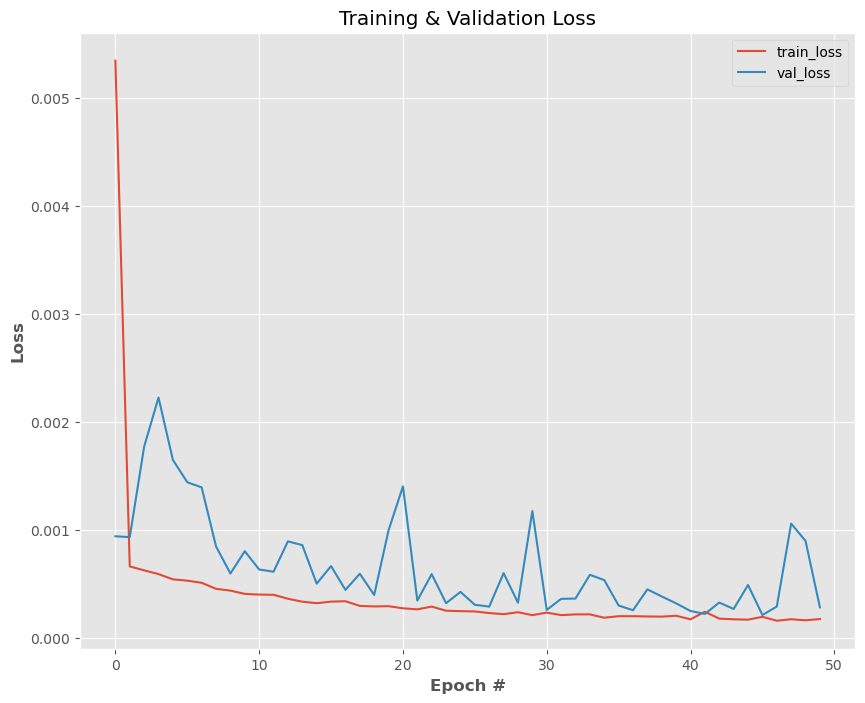

In [21]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [22]:
ab = pd.DataFrame(ytest)
ab.rename(columns={0:"ytest"},inplace=True)
ab.head()

,ytest
0,0.628639
1,0.632425
2,0.637220
3,0.640754
4,0.648242


In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict =model.predict(X_test)

39/39 [==============================] - 4s 92ms/step


In [40]:
ab['test_predict'] = test_predict

In [41]:
train_predict[0]

array([0.33313], dtype=float32)

In [42]:
train_predict

array([[0.33313   ],
       [0.34641185],
       [0.3497676 ],
       ...,
       [0.48472092],
       [0.4866617 ],
       [0.48905352]], dtype=float32)

In [43]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(ab['ytest'],ab['test_predict'])

{'mape': 1.8581945406046396}

In [44]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [45]:
train_predict[0]

array([46.79583], dtype=float32)

In [46]:
df["close"]

datetime
1998-01-02    37.50
1998-01-05    37.13
1998-01-06    35.63
1998-01-07    34.69
1998-01-08    35.76
              ...  
2024-02-08    96.66
2024-02-09    97.29
2024-02-10    97.30
2024-02-12    95.47
2024-02-13    93.87
Name: close, Length: 6615, dtype: float64

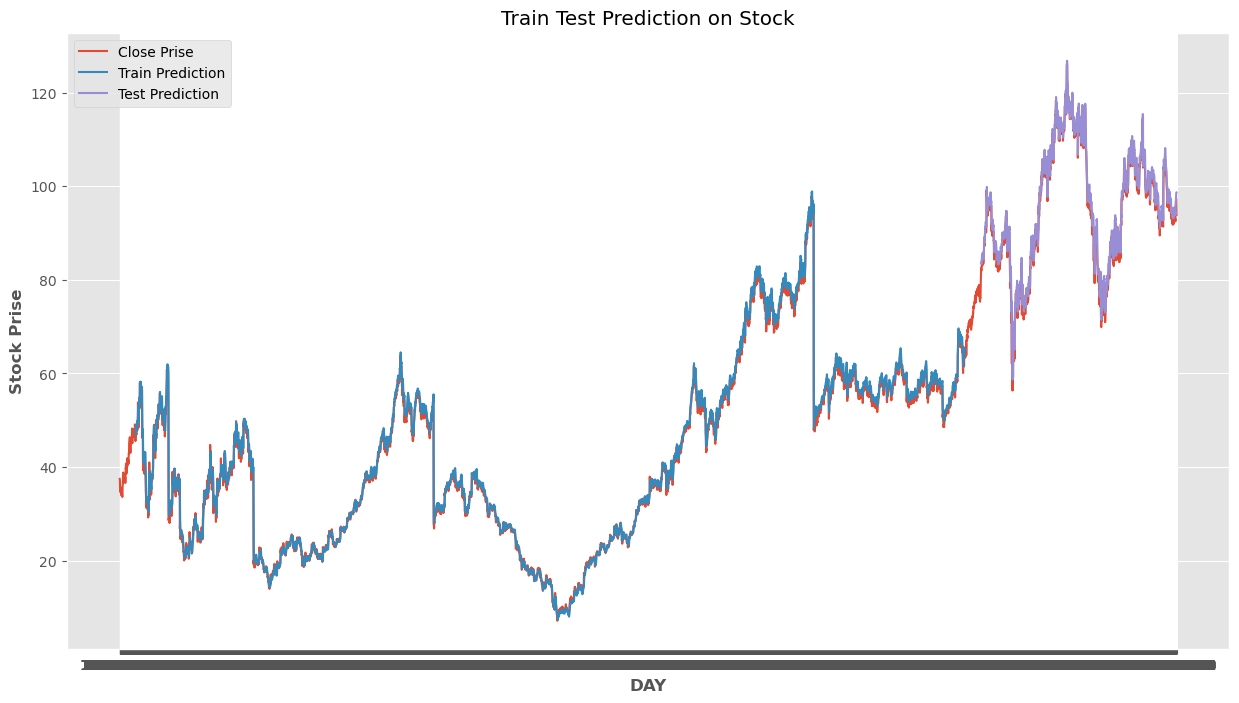

In [47]:
# shift train predictions for plotting
import numpy
plt.style.use("ggplot")
plt.figure(figsize = [15,8])

# plot actual stock prise
plt.plot(df["close"], label="Close Prise")

# plot predicted train prise
look_back=100
trainPredictPlot = numpy.empty_like(Close_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
plt.plot(trainPredictPlot, label="Train Prediction")

# plot predicted test prise
testPredictPlot = numpy.empty_like(Close_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Close_scaled)-1, :] = test_predict
plt.plot(testPredictPlot, label="Test Prediction")

plt.title("Train Test Prediction on Stock")
plt.xlabel("DAY", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

In [48]:
len(test_data)

1323

In [49]:
1323 - 100

1223

In [50]:
test_data[1223:].reshape(1,-1)

array([[0.71302373, 0.7085647 , 0.70915363, 0.72732627, 0.73170116,
        0.72808346, 0.73372034, 0.73186943, 0.73212182, 0.73531886,
        0.73027091, 0.71891301, 0.71361265, 0.72320377, 0.71521117,
        0.70797577, 0.7808346 , 0.80296147, 0.81474003, 0.81154299,
        0.81675921, 0.79934377, 0.81701161, 0.81709574, 0.810281  ,
        0.82794885, 0.83181895, 0.8412418 , 0.82735992, 0.82769645,
        0.81659095, 0.81187952, 0.80969207, 0.80960794, 0.80439172,
        0.80052162, 0.79059398, 0.77965674, 0.77511358, 0.77410399,
        0.77385159, 0.76039038, 0.74322733, 0.75609961, 0.75079926,
        0.75239778, 0.75222951, 0.76501767, 0.76468114, 0.76442874,
        0.76207303, 0.75315497, 0.75307084, 0.75172472, 0.76156823,
        0.73616019, 0.74146054, 0.74120814, 0.74120814, 0.74432105,
        0.74120814, 0.7465085 , 0.74734982, 0.74726569, 0.72749453,
        0.72387683, 0.72631668, 0.72185765, 0.72177352, 0.73170116,
        0.72253071, 0.72631668, 0.72118459, 0.71

In [51]:
x_input=test_data[1223:].reshape(1,-1)
x_input.shape

(1, 100)

In [52]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [53]:
print("temp input sample: ", temp_input[:10])

temp input sample:  [0.7130237253912165, 0.7085646979639911, 0.7091536261147567, 0.7273262661955241, 0.7317011610297829, 0.7280834595322226, 0.7337203432609791, 0.7318694262157158, 0.7321218239946155, 0.7353188625273429]


In [54]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("--"*25)
        print("{} - day input : {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} - day output:  {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print()
print("FINAL 30 DAY OUTPUT")
print(lst_output)

[0.73940027]
101
--------------------------------------------------
1 - day input : [0.7085647  0.70915363 0.72732627 0.73170116 0.72808346 0.73372034
 0.73186943 0.73212182 0.73531886 0.73027091 0.71891301 0.71361265
 0.72320377 0.71521117 0.70797577 0.7808346  0.80296147 0.81474003
 0.81154299 0.81675921 0.79934377 0.81701161 0.81709574 0.810281
 0.82794885 0.83181895 0.8412418  0.82735992 0.82769645 0.81659095
 0.81187952 0.80969207 0.80960794 0.80439172 0.80052162 0.79059398
 0.77965674 0.77511358 0.77410399 0.77385159 0.76039038 0.74322733
 0.75609961 0.75079926 0.75239778 0.75222951 0.76501767 0.76468114
 0.76442874 0.76207303 0.75315497 0.75307084 0.75172472 0.76156823
 0.73616019 0.74146054 0.74120814 0.74120814 0.74432105 0.74120814
 0.7465085  0.74734982 0.74726569 0.72749453 0.72387683 0.72631668
 0.72185765 0.72177352 0.73170116 0.72253071 0.72631668 0.72118459
 0.71310786 0.71319199 0.7194178  0.71142521 0.72488642 0.72909305
 0.72892479 0.72227831 0.71277133 0.71352852 0.

7 - day output:  [[0.80797744]]
--------------------------------------------------
8 - day input : [0.73212182 0.73531886 0.73027091 0.71891301 0.71361265 0.72320377
 0.71521117 0.70797577 0.7808346  0.80296147 0.81474003 0.81154299
 0.81675921 0.79934377 0.81701161 0.81709574 0.810281   0.82794885
 0.83181895 0.8412418  0.82735992 0.82769645 0.81659095 0.81187952
 0.80969207 0.80960794 0.80439172 0.80052162 0.79059398 0.77965674
 0.77511358 0.77410399 0.77385159 0.76039038 0.74322733 0.75609961
 0.75079926 0.75239778 0.75222951 0.76501767 0.76468114 0.76442874
 0.76207303 0.75315497 0.75307084 0.75172472 0.76156823 0.73616019
 0.74146054 0.74120814 0.74120814 0.74432105 0.74120814 0.7465085
 0.74734982 0.74726569 0.72749453 0.72387683 0.72631668 0.72185765
 0.72177352 0.73170116 0.72253071 0.72631668 0.72118459 0.71310786
 0.71319199 0.7194178  0.71142521 0.72488642 0.72909305 0.72892479
 0.72227831 0.71277133 0.71352852 0.71840821 0.72025913 0.72034326
 0.72892479 0.73178529 0.722278

15 - day output:  [[0.87874585]]
--------------------------------------------------
16 - day input : [0.7808346  0.80296147 0.81474003 0.81154299 0.81675921 0.79934377
 0.81701161 0.81709574 0.810281   0.82794885 0.83181895 0.8412418
 0.82735992 0.82769645 0.81659095 0.81187952 0.80969207 0.80960794
 0.80439172 0.80052162 0.79059398 0.77965674 0.77511358 0.77410399
 0.77385159 0.76039038 0.74322733 0.75609961 0.75079926 0.75239778
 0.75222951 0.76501767 0.76468114 0.76442874 0.76207303 0.75315497
 0.75307084 0.75172472 0.76156823 0.73616019 0.74146054 0.74120814
 0.74120814 0.74432105 0.74120814 0.7465085  0.74734982 0.74726569
 0.72749453 0.72387683 0.72631668 0.72185765 0.72177352 0.73170116
 0.72253071 0.72631668 0.72118459 0.71310786 0.71319199 0.7194178
 0.71142521 0.72488642 0.72909305 0.72892479 0.72227831 0.71277133
 0.71352852 0.71840821 0.72025913 0.72034326 0.72892479 0.73178529
 0.72227831 0.72463402 0.72152112 0.72160525 0.71756689 0.74415278
 0.74171294 0.75265018 0.75795

22 - day output:  [[0.9189938]]
--------------------------------------------------
23 - day input : [0.81709574 0.810281   0.82794885 0.83181895 0.8412418  0.82735992
 0.82769645 0.81659095 0.81187952 0.80969207 0.80960794 0.80439172
 0.80052162 0.79059398 0.77965674 0.77511358 0.77410399 0.77385159
 0.76039038 0.74322733 0.75609961 0.75079926 0.75239778 0.75222951
 0.76501767 0.76468114 0.76442874 0.76207303 0.75315497 0.75307084
 0.75172472 0.76156823 0.73616019 0.74146054 0.74120814 0.74120814
 0.74432105 0.74120814 0.7465085  0.74734982 0.74726569 0.72749453
 0.72387683 0.72631668 0.72185765 0.72177352 0.73170116 0.72253071
 0.72631668 0.72118459 0.71310786 0.71319199 0.7194178  0.71142521
 0.72488642 0.72909305 0.72892479 0.72227831 0.71277133 0.71352852
 0.71840821 0.72025913 0.72034326 0.72892479 0.73178529 0.72227831
 0.72463402 0.72152112 0.72160525 0.71756689 0.74415278 0.74171294
 0.75265018 0.75795053 0.75803466 0.7426384  0.72917718 0.73940027
 0.74702537 0.75682628 0.7669

29 - day output:  [[0.93372464]]

FINAL 30 DAY OUTPUT
[[0.7394002676010132], [0.7470253705978394], [0.7568262815475464], [0.7669492363929749], [0.7772706747055054], [0.7876343131065369], [0.7978994846343994], [0.8079774379730225], [0.8178223967552185], [0.827412486076355], [0.8367367386817932], [0.8457837104797363], [0.8545360565185547], [0.8629691004753113], [0.8710510730743408], [0.8787458539009094], [0.8860152959823608], [0.8928220272064209], [0.8991333246231079], [0.9049216508865356], [0.9101674556732178], [0.9148591160774231], [0.9189937710762024], [0.9225767254829407], [0.9256215691566467], [0.9281493425369263], [0.9301878213882446], [0.9317702651023865], [0.9329351186752319], [0.9337246417999268]]


In [55]:
len(Close_scaled)

6615

In [56]:
6615-100

6515

In [57]:
100+300


400

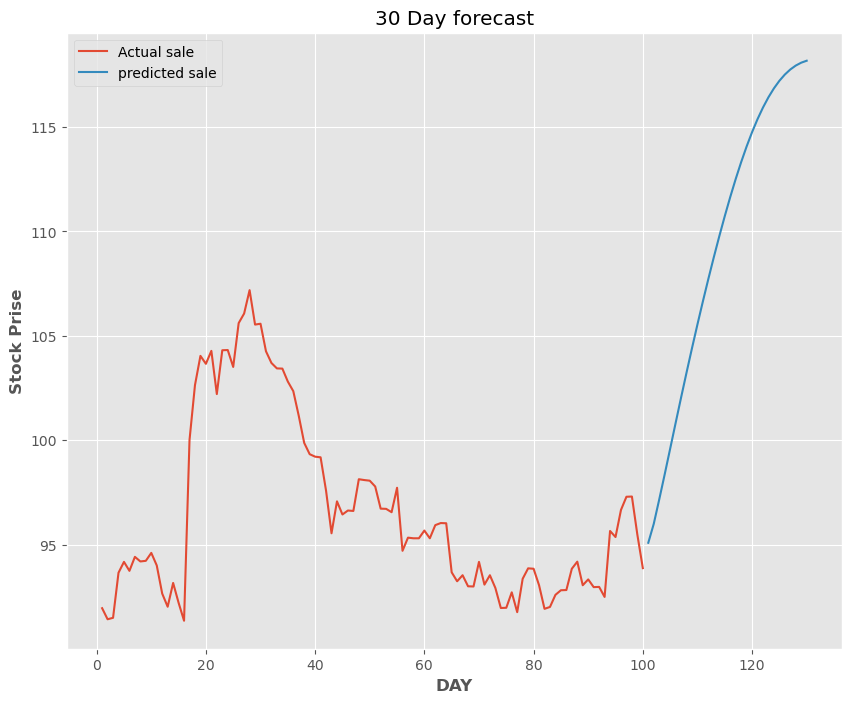

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)



plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(day_new,scaler.inverse_transform(Close_scaled[6515:]) , label="Actual sale")
plt.plot(day_pred,scaler.inverse_transform(lst_output), label="predicted sale")
plt.title("30 Day forecast")
plt.xlabel("DAY", weight="bold")
plt.ylabel("Stock Prise", weight="bold")
plt.legend()
plt.show()

In [59]:
50 + 30

80